# First work version
## Contains solution for Task 1 
### Реализуйте метод потенциальных функций на примере датасета iris. Данный датасет лучше скачивать отсюда https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from potentialClassifier import PotentialClassifier
from kernels import Kernels

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we takeirst four features.
y = iris.target
feature_names = iris.feature_names

(0.0, 1.8)

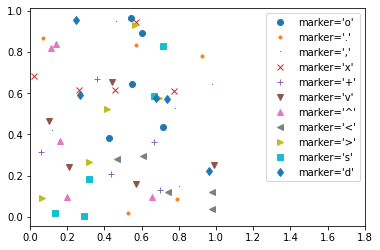

In [3]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

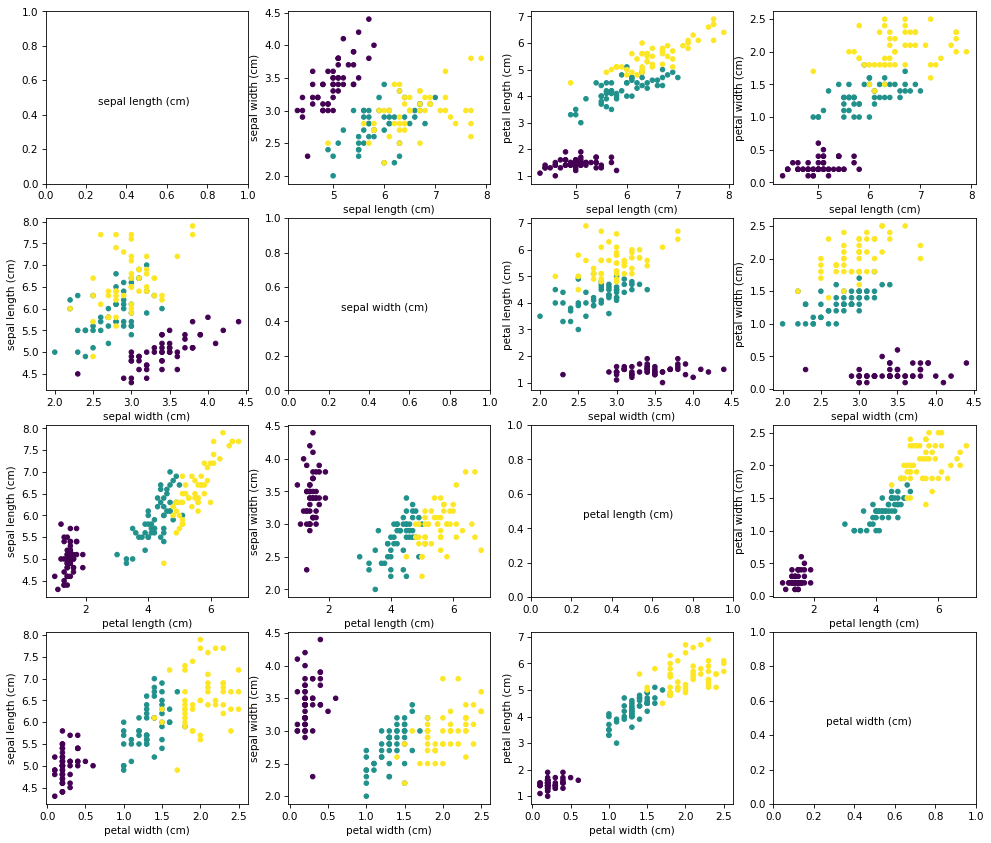

In [4]:
plt.figure(figsize=(16, 14), dpi = 75)
k = 0
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, k + 1)
        k += 1
        if i == j:
            plt.text(0.26, 0.46, feature_names[i])
        else:
            plt.scatter(X[:, i], X[:, j], c = y, marker='.', s = 75)
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])

In [5]:
# разделяем треин и тест данные с коэффициентом test_size с сидом random_state
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 10) 

In [6]:
poten = PotentialClassifier(train_x, train_y, Kernels().NewtonianPotential, 10, 1)
poten.fit()
poten.show_accuracy(X, y, test_x, test_y)

Accuracy
On test  =  0.9466666666666667
On train =  0.9166666666666666
On full data:  0.96


Charges of points =  [1 1 1 1 1 1 1 1 1 1 1 1]


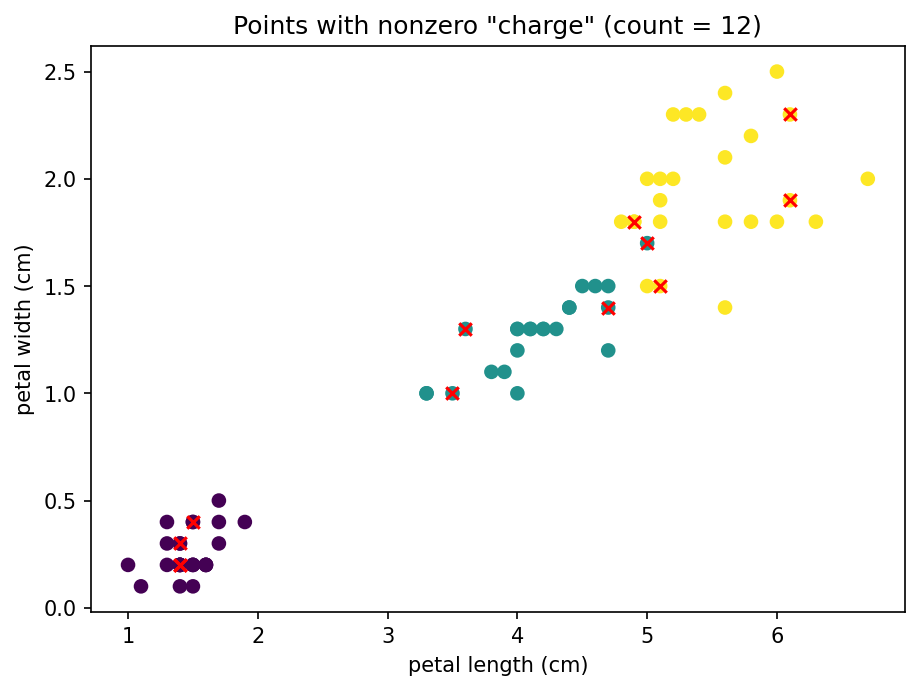

In [7]:
# Выделенные фичи (можно взять другие)
highlighted_features = (2, 3)
highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
# Построения графика значений для этих фич и помечание ненулевых зарядов
plt.figure(figsize=(7, 5), dpi=150)
plt.title(f"Points with nonzero \"charge\" (count = {len(poten.indexes)})")
plt.scatter(train_x[:, highlighted_features[0]], train_x[:, highlighted_features[1]], c=train_y) # все точки по классам
plt.scatter(train_x[:, highlighted_features[0]][poten.indexes], train_x[:, highlighted_features[1]][poten.indexes], c='r', marker='x') # точки с ненулевым зарядом
plt.xlabel(highlighted_features_names[0])
plt.ylabel(highlighted_features_names[1])
print("Charges of points = ", poten.charges)

Points with nonzero "charge" (count = 12)


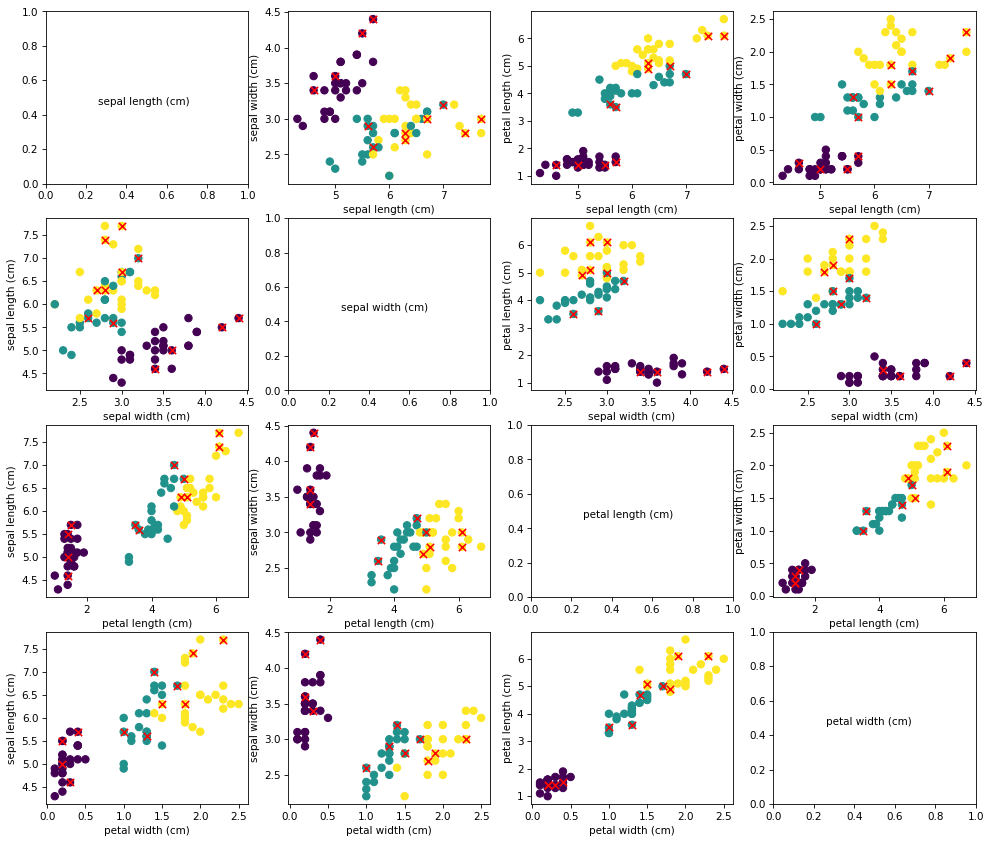

In [8]:
plt.figure(figsize=(16, 14), dpi = 75)
print(f"Points with nonzero \"charge\" (count = {len(poten.indexes)})")
i = 0
for x_ in range(4):
    for y_ in range(4):
        plt.subplot(4, 4, i + 1)
        i += 1
        if x_ == y_:
            plt.text(0.26, 0.46, feature_names[x_])
        else:
            plt.scatter(train_x[:, x_], train_x[:, y_], c = train_y, marker='o', s = 50)
            plt.scatter(train_x[:, x_][poten.indexes], train_x[:, y_][poten.indexes], c = 'r', marker='x', s = 50) # точки с ненулевым зарядом
            plt.xlabel(feature_names[x_])
            plt.ylabel(feature_names[y_])

In [9]:
bad_predictions_array = poten.get_bad_prediction_arr(test_x, test_y)

Points where prediction is wrong (count = 4)


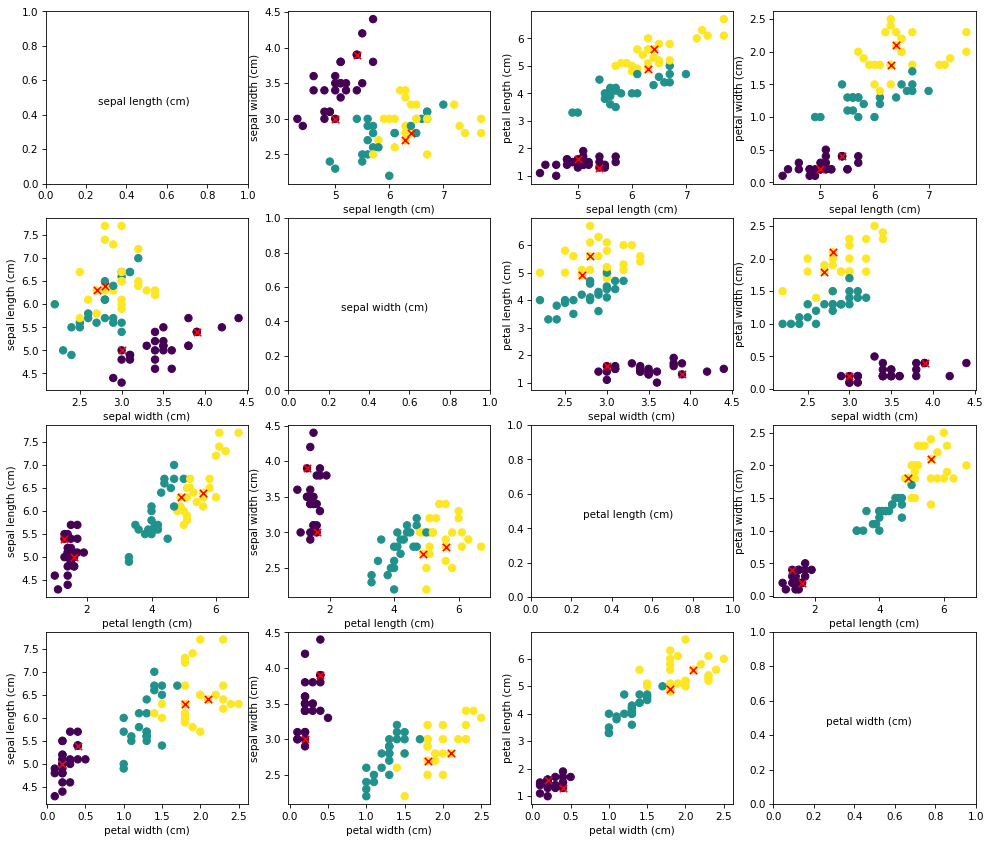

In [10]:
plt.figure(figsize=(16, 14), dpi = 75)
print(f"Points where prediction is wrong (count = {len(bad_predictions_array)})")
i = 0
for x_ in range(4):
    for y_ in range(4):
        plt.subplot(4, 4, i + 1)
        i += 1
        if x_ == y_:
            plt.text(0.26, 0.46, feature_names[x_])
        else:
            plt.scatter(train_x[:, x_], train_x[:, y_], c = train_y, marker='o', s = 50)
            plt.scatter(train_x[:, x_][bad_predictions_array], train_x[:, y_][bad_predictions_array], c = 'r', marker='x', s = 50) # точки с ложными предсказанием
            plt.xlabel(feature_names[x_])
            plt.ylabel(feature_names[y_])

# Addition task
## 1) Передавать ядро, окно и количество эпох (done)
## 2) Уменьшить количество нулевых объектов в фиолетовом классе или другими словами реализовать другие ядра и сравнить с первоначальным, также стоит "поиграться" с размером окна и количеством эпох (done)
## 3) Сравнить начально полученное решение с решением sklearn (done)

In [11]:
#Kernel, window width and epoch number test
def kwe_test(kernel, window_width, epoch_number, show_plots = True):
    iris = datasets.load_iris()
    X = iris.data  # we takeirst four features.
    y = iris.target
    feature_names = iris.feature_names
    # разделяем треин и тест данные с коэффициентом test_size с сидом random_state
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 10)
    poten = PotentialClassifier(train_x, train_y, kernel, window_width, epoch_number)
    poten.fit()
    poten.show_accuracy(X, y, test_x, test_y)
    # Выделенные фичи (можно взять другие)
    highlighted_features = (2, 3)
    highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
    # Построения графика значений для этих фич и помечание ненулевых зарядов
    if show_plots:
        plt.figure(figsize=(7, 5), dpi=150)
        plt.title(f"Points with nonzero \"charge\" (count = {len(poten.indexes)})")
        plt.scatter(train_x[:, highlighted_features[0]], train_x[:, highlighted_features[1]], c=train_y) # все точки по классам
        plt.scatter(train_x[:, highlighted_features[0]][poten.indexes], train_x[:, highlighted_features[1]][poten.indexes], c='r', marker='x') # точки с ненулевым зарядом
        plt.xlabel(highlighted_features_names[0])
        plt.ylabel(highlighted_features_names[1])
        plt.show()
    print("Charges of points = ", poten.charges)
    
    print(f"Points with nonzero \"charge\" (count = {len(poten.indexes)})")
    if show_plots:
        plt.figure(figsize=(16, 14), dpi = 75)
        k = 0
        for i in range(4):
            for j in range(4):
                plt.subplot(4, 4, k + 1)
                k += 1
                if i == j:
                    plt.text(0.26, 0.46, feature_names[i])
                else:
                    plt.scatter(train_x[:, i], train_x[:, j], c = train_y, marker = 'o', s = 50)
                    plt.scatter(train_x[:, i][poten.indexes], train_x[:, j][poten.indexes], c = 'r', marker='x', s = 50) # точки с ненулевым зарядом
                    plt.xlabel(feature_names[i])
                    plt.ylabel(feature_names[j])
        plt.show()
    bad_predictions_array = poten.get_bad_prediction_arr(test_x, test_y)
    print(f"Points where prediction is wrong (count = {len(bad_predictions_array)})")
    print(f"Total number of predictions is {train_x.shape[0]}")
    if show_plots:
        plt.figure(figsize = (16, 14), dpi = 75)
        k = 0
        for i in range(4):
            for j in range(4):
                plt.subplot(4, 4, k + 1)
                k += 1
                if i == j:
                    plt.text(0.26, 0.46, feature_names[i])
                else:
                    plt.scatter(train_x[:, i], train_x[:, j], c = train_y, marker='o', s = 50)
                    plt.scatter(train_x[:, i][bad_predictions_array], train_x[:, j][bad_predictions_array], c = 'r', marker=  'x', s = 50) # точки с ложными предсказанием
                    plt.xlabel(feature_names[i])
                    plt.ylabel(feature_names[j])

## Filter comparing

### NewtonianPotential

Accuracy
On test  =  0.9466666666666667
On train =  0.9166666666666666
On full data:  0.96


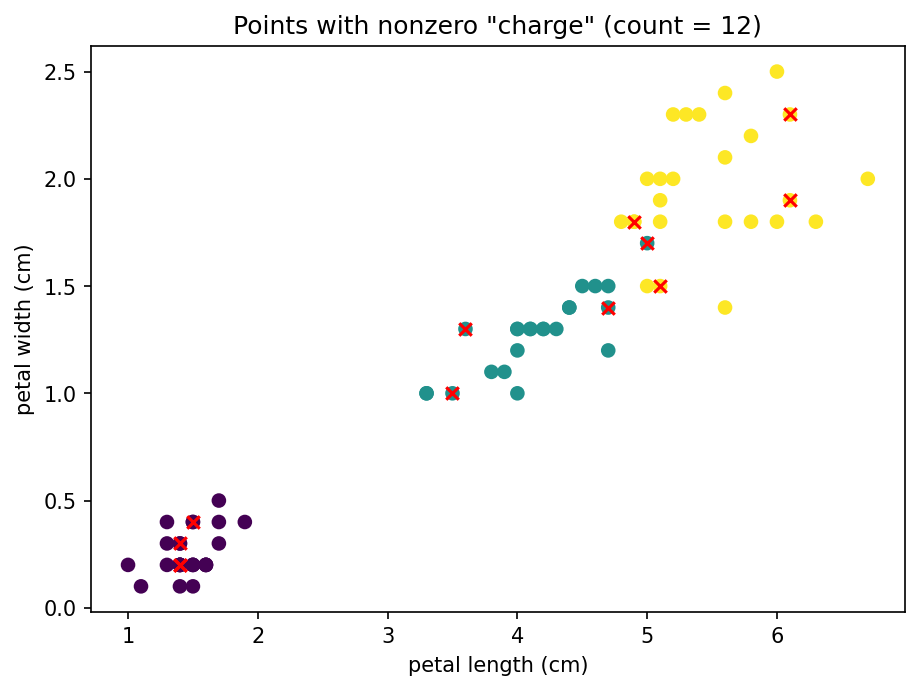

Charges of points =  [1 1 1 1 1 1 1 1 1 1 1 1]
Points with nonzero "charge" (count = 12)


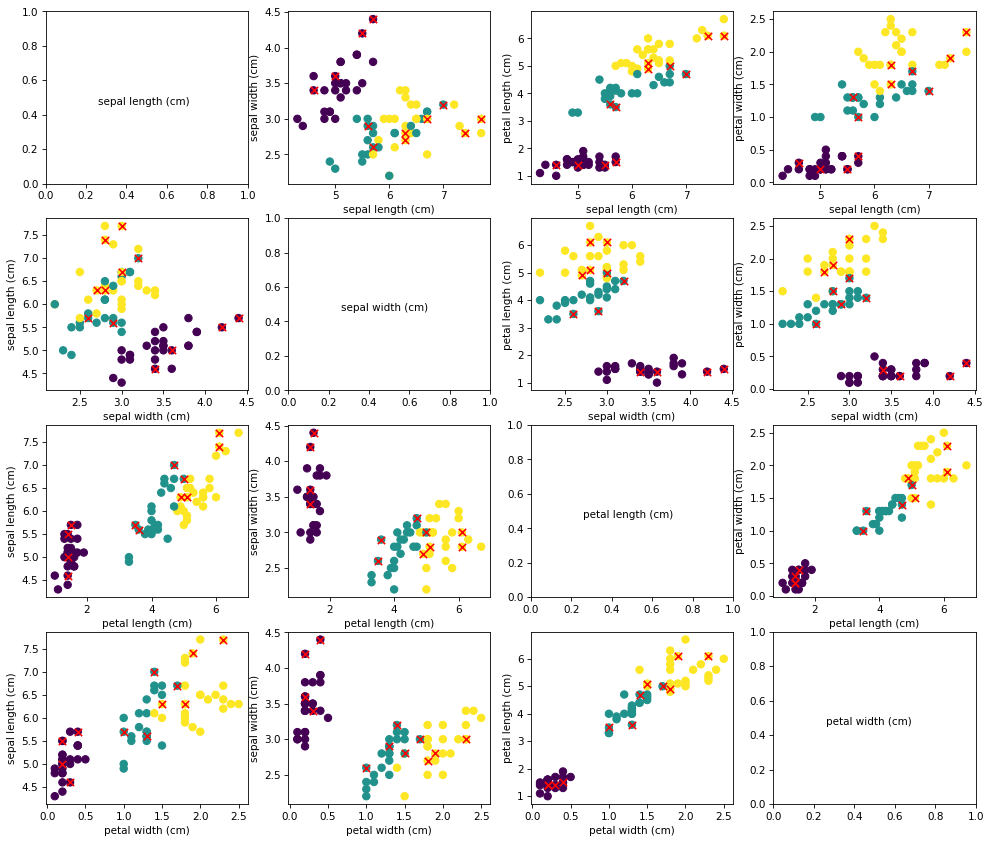

Points where prediction is wrong (count = 4)
Total number of predictions is 75


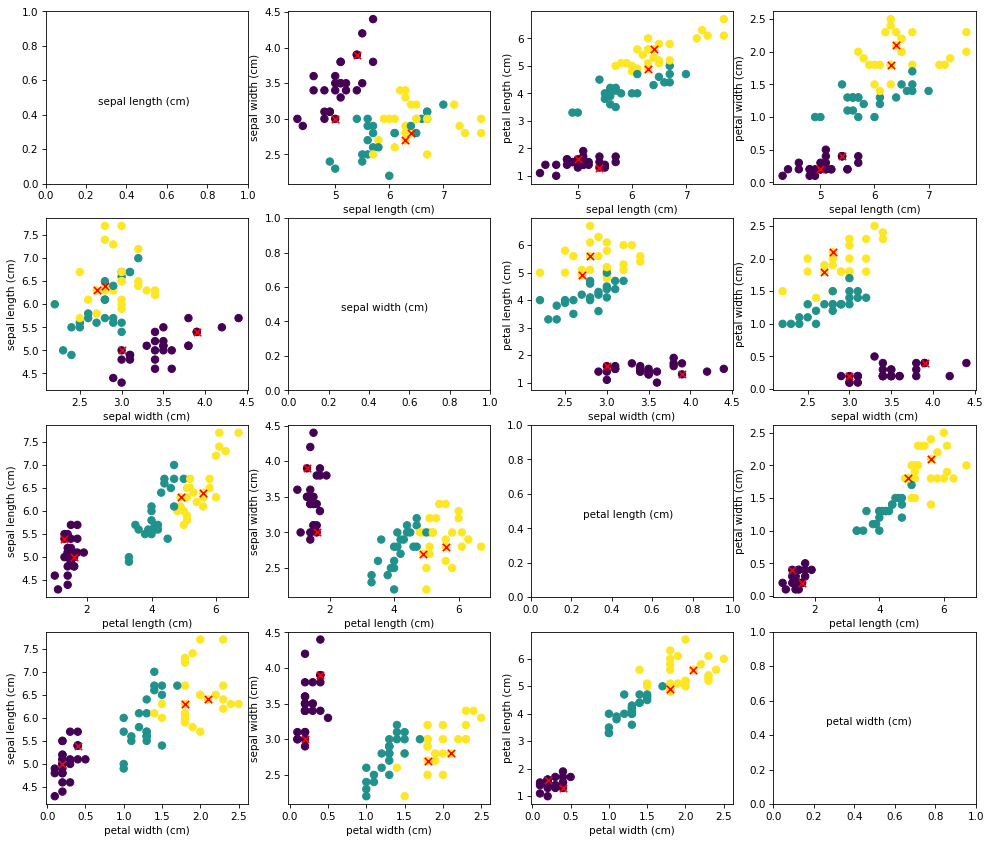

In [12]:
kwe_test(Kernels().NewtonianPotential, 10, 1, True)

### Epanechnikov

Accuracy
On test  =  0.96
On train =  0.896551724137931
On full data:  0.96


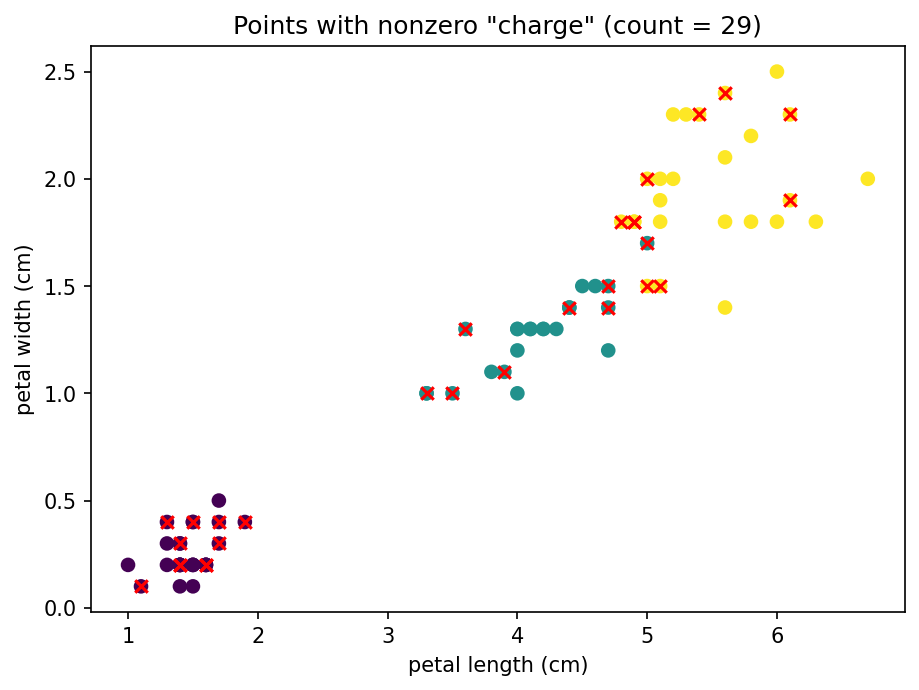

Charges of points =  [1 1 1 4 4 2 1 4 6 2 1 4 4 2 6 2 6 6 1 6 7 5 2 6 2 1 1 2 3]
Points with nonzero "charge" (count = 29)


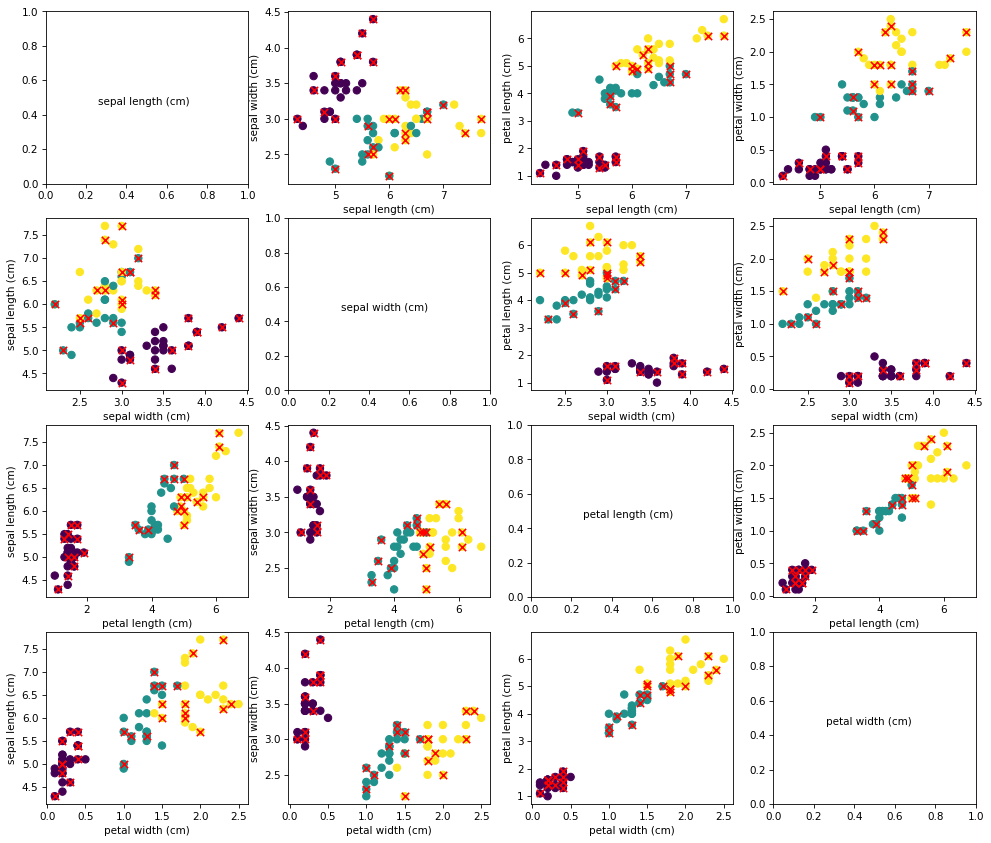

Points where prediction is wrong (count = 3)
Total number of predictions is 75


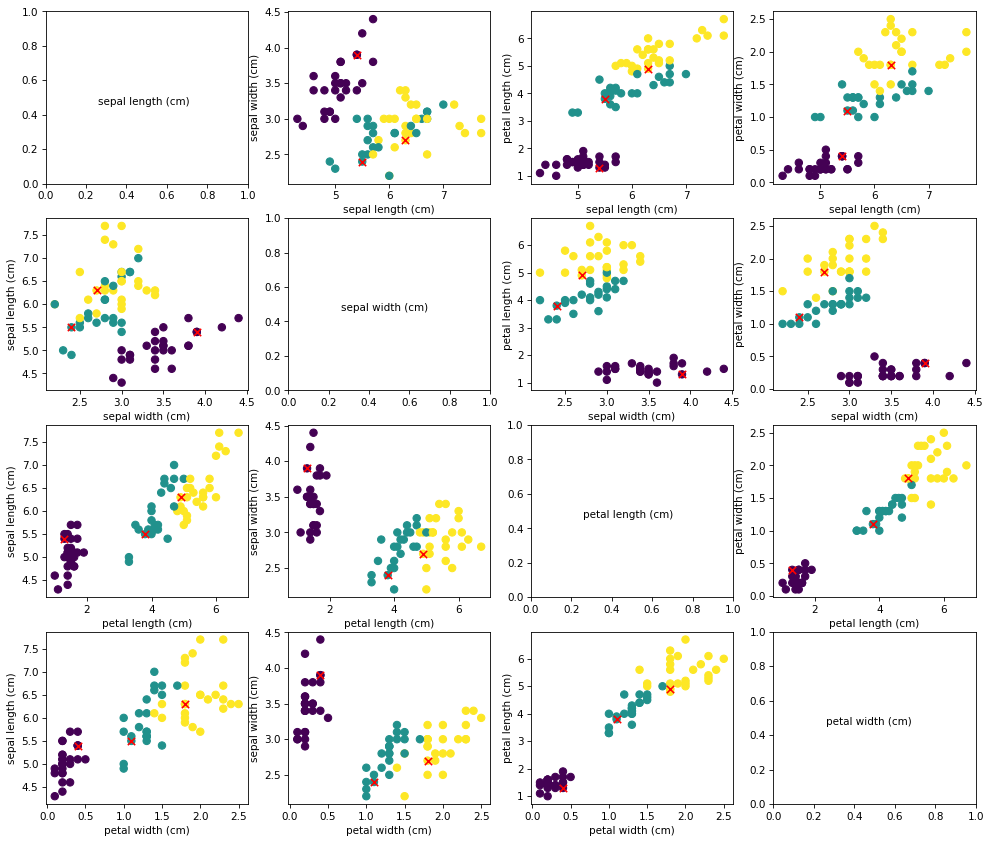

In [13]:
kwe_test(Kernels().Epanechnikov, 10, 7, True)

### Quarter

Accuracy
On test  =  0.9466666666666667
On train =  0.8928571428571429
On full data:  0.9533333333333334


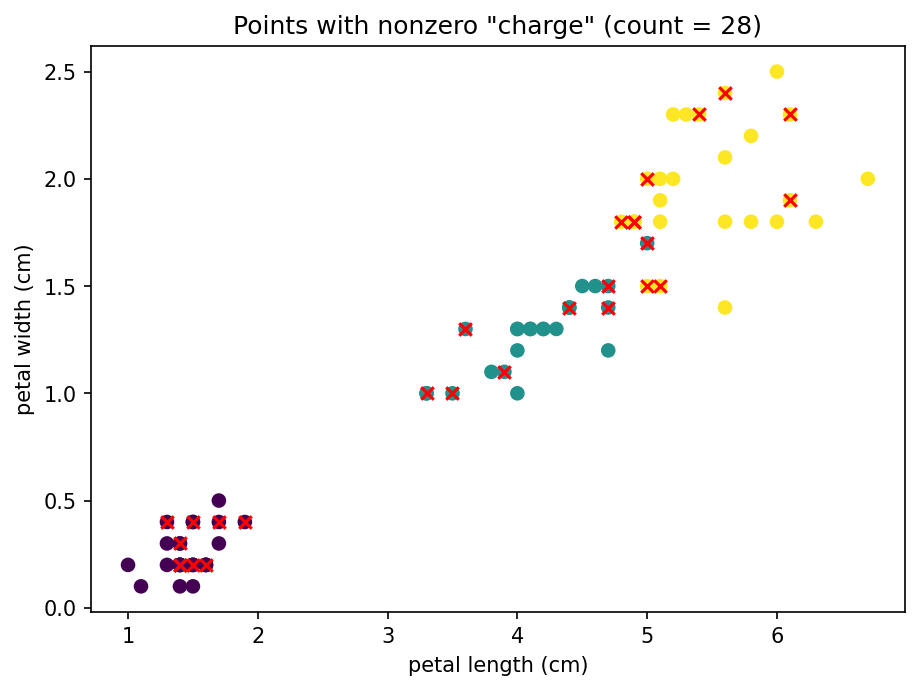

Charges of points =  [1 1 1 1 3 1 1 2 3 2 1 1 2 3 1 2 3 3 4 2 2 3 1 1 1 1 2 2]
Points with nonzero "charge" (count = 28)


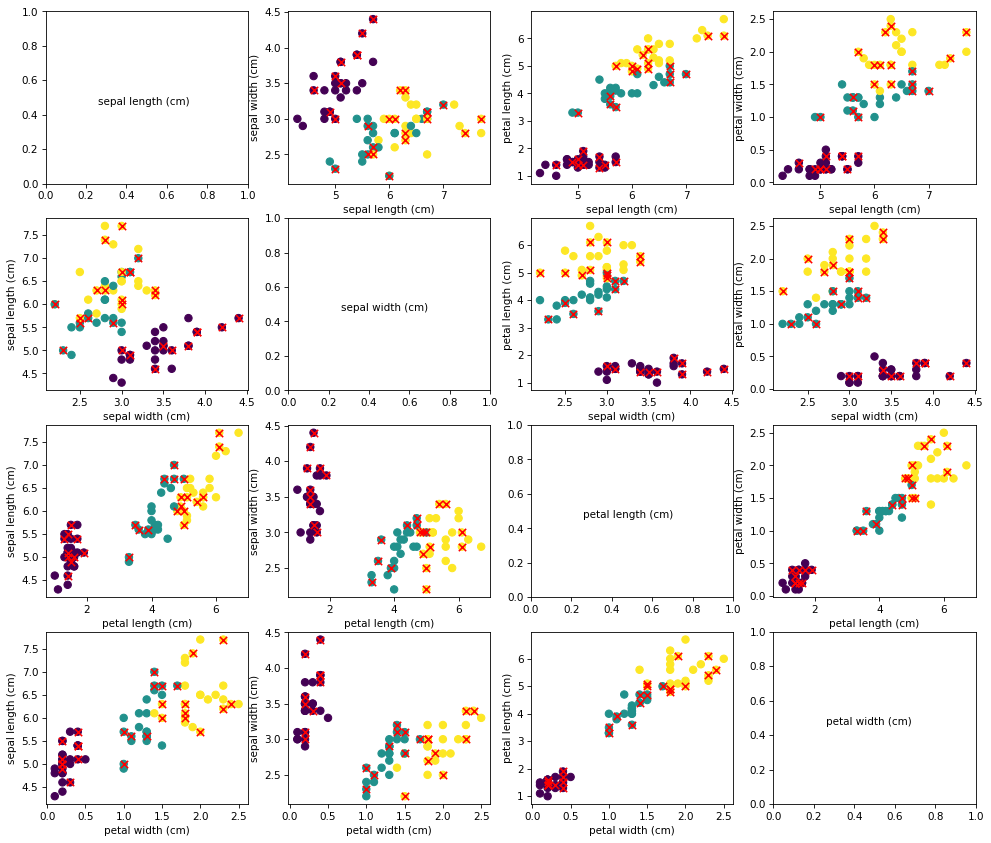

Points where prediction is wrong (count = 4)
Total number of predictions is 75


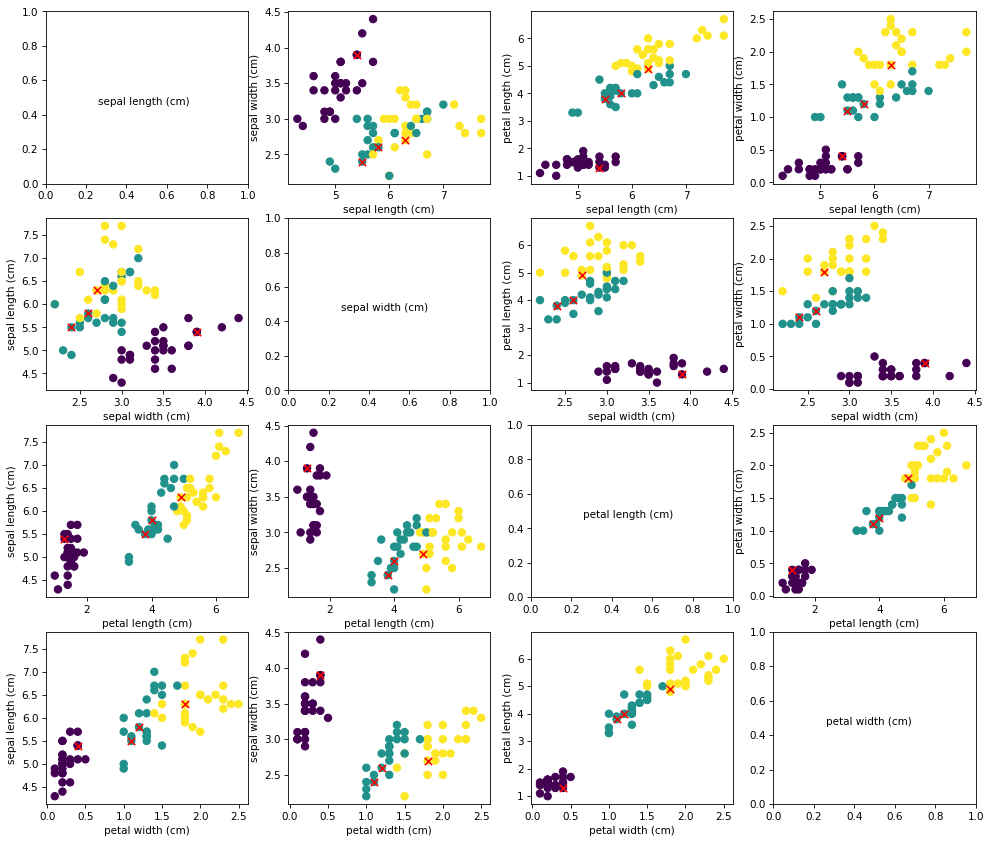

In [14]:
kwe_test(Kernels().Quarter, 10, 4, True)

### Triangular

Accuracy
On test  =  0.9733333333333334
On train =  1.0
On full data:  0.9866666666666667


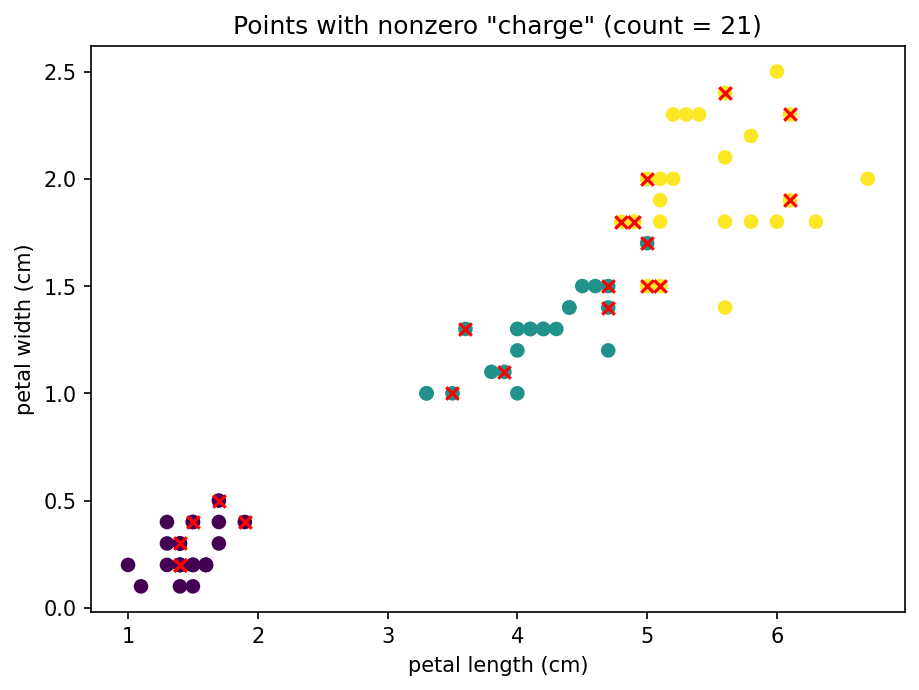

Charges of points =  [1 1 1 1 1 1 1 1 1 1 2 1 4 2 1 2 1 1 1 2 1]
Points with nonzero "charge" (count = 21)


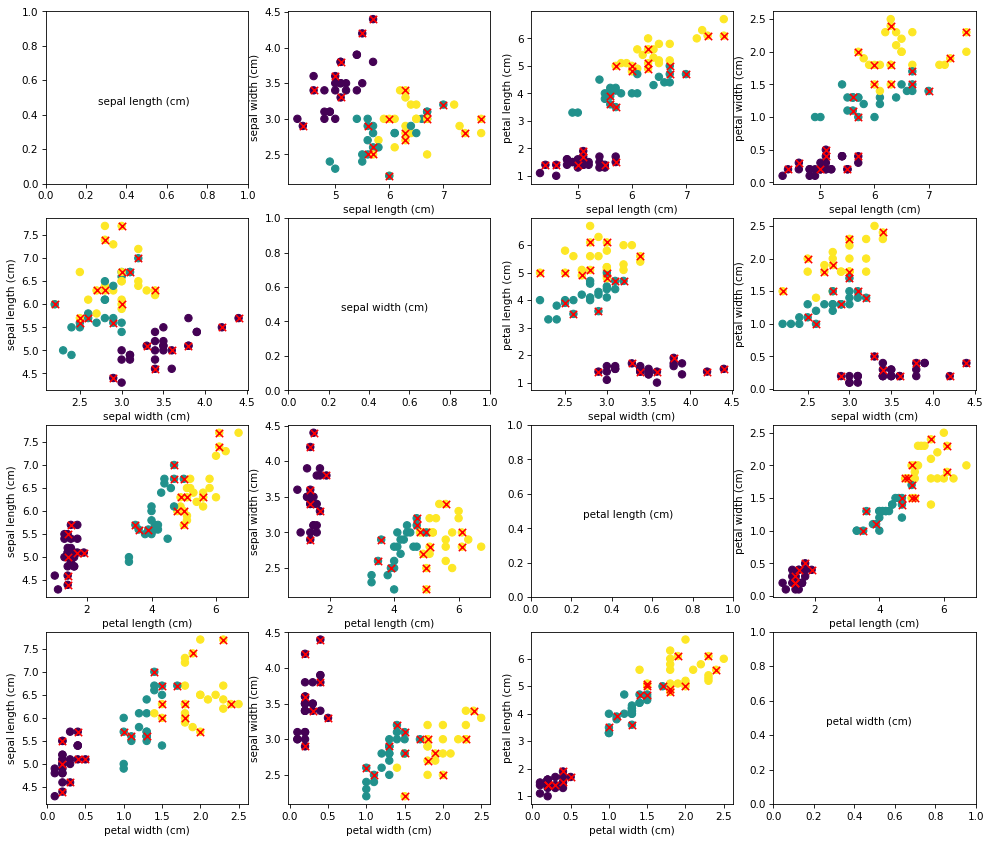

Points where prediction is wrong (count = 2)
Total number of predictions is 75


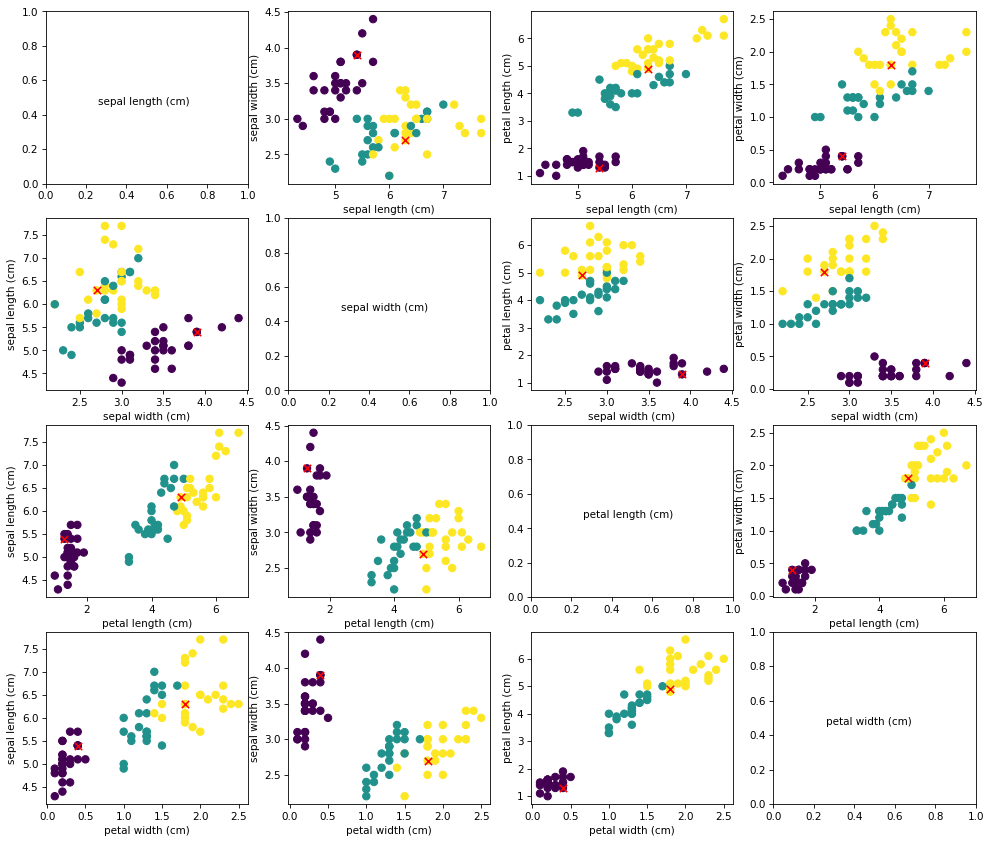

In [15]:
kwe_test(Kernels().Triangular, 10, 4, True)

### Gaussian

Accuracy
On test  =  0.92
On train =  0.8
On full data:  0.9266666666666666


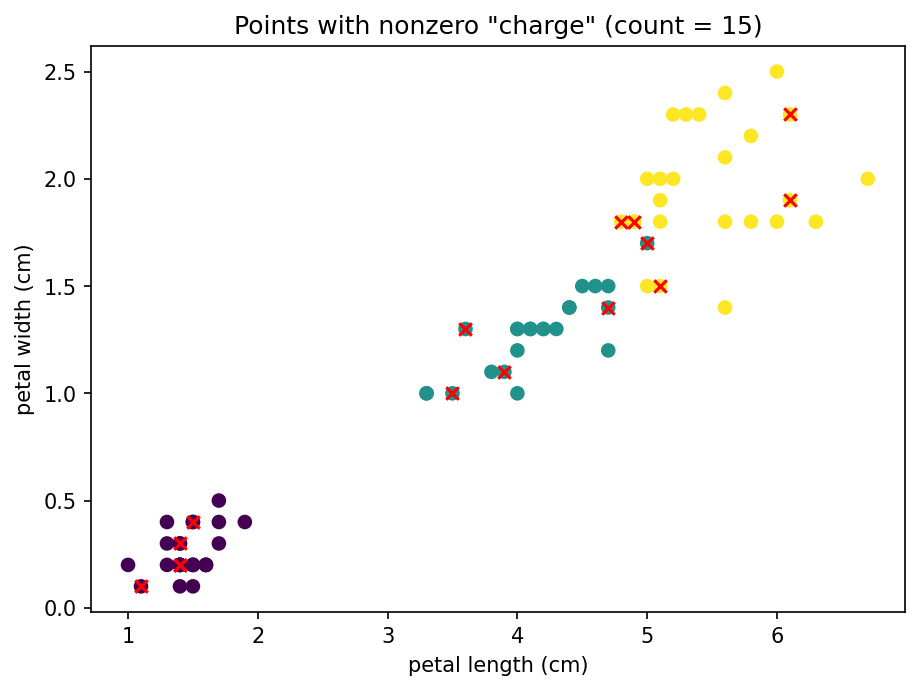

Charges of points =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Points with nonzero "charge" (count = 15)


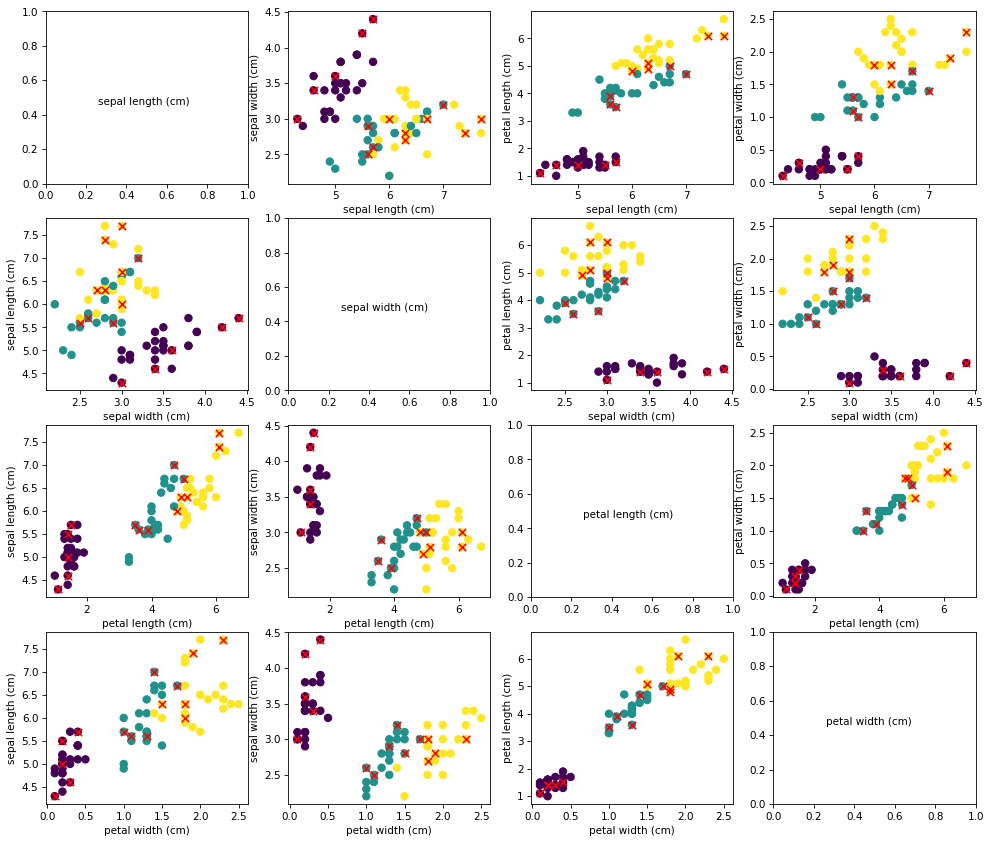

Points where prediction is wrong (count = 6)
Total number of predictions is 75


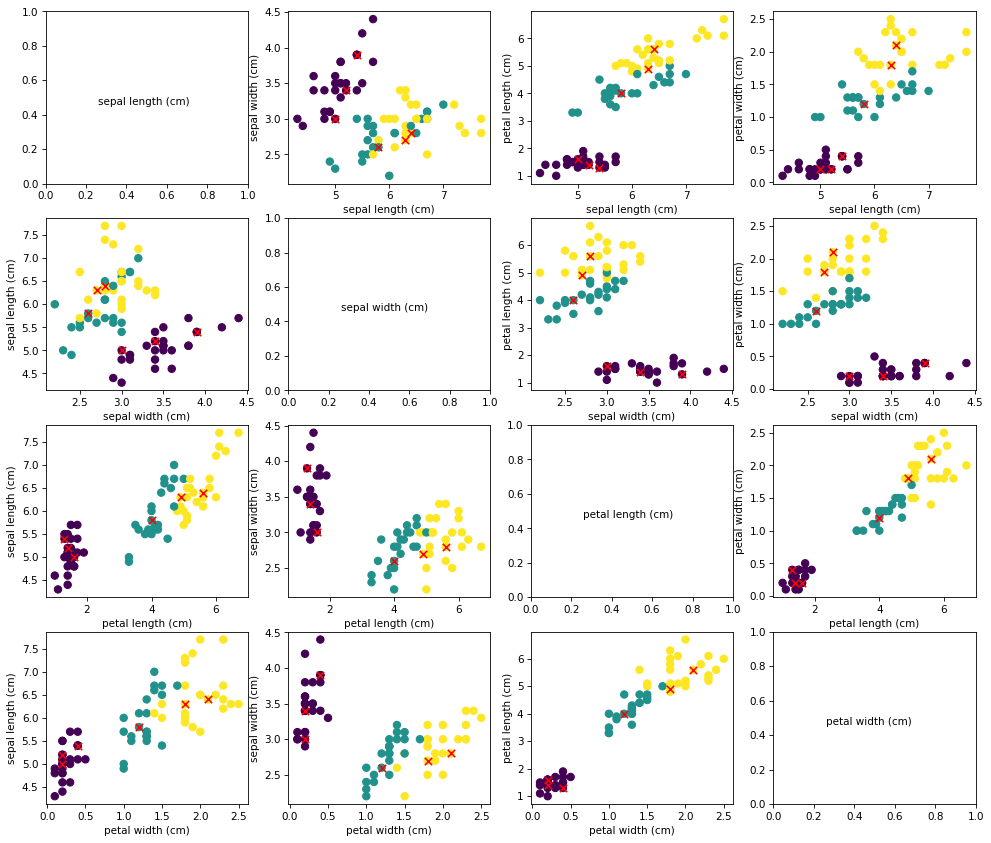

In [33]:
# set 1 step for more purple 
# set 30 step for less nonzero charges
kwe_test(Kernels().Gaussian, 10, 1, True)

### Rect

Accuracy
On test  =  0.30666666666666664
On train =  0.3333333333333333
On full data:  0.3333333333333333


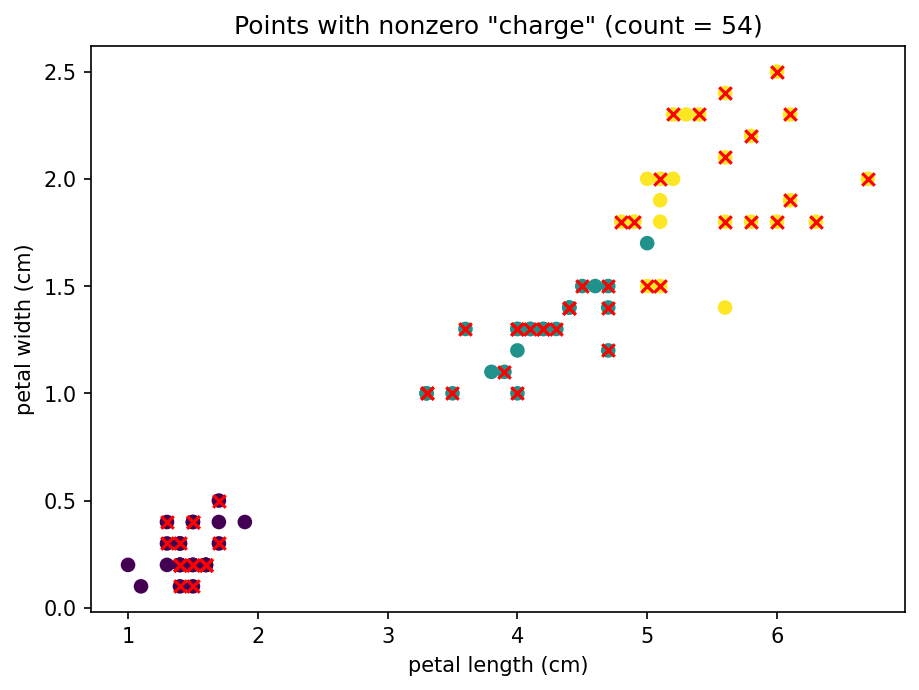

Charges of points =  [2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Points with nonzero "charge" (count = 54)


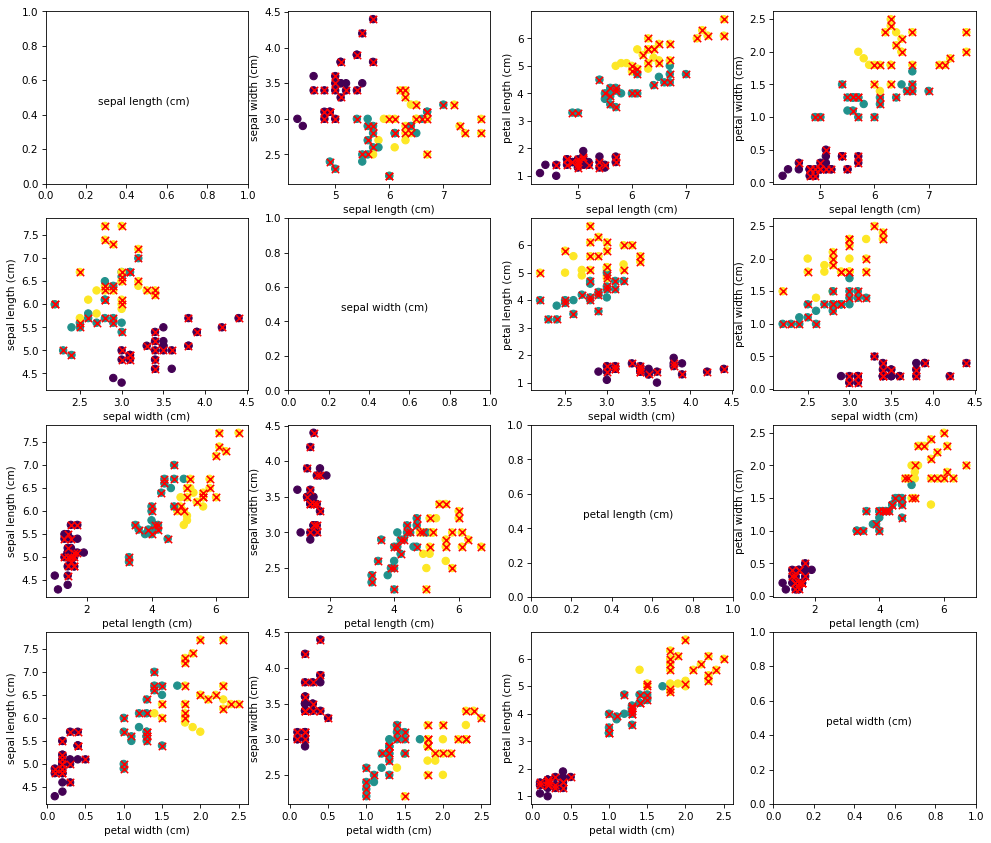

Points where prediction is wrong (count = 52)
Total number of predictions is 75


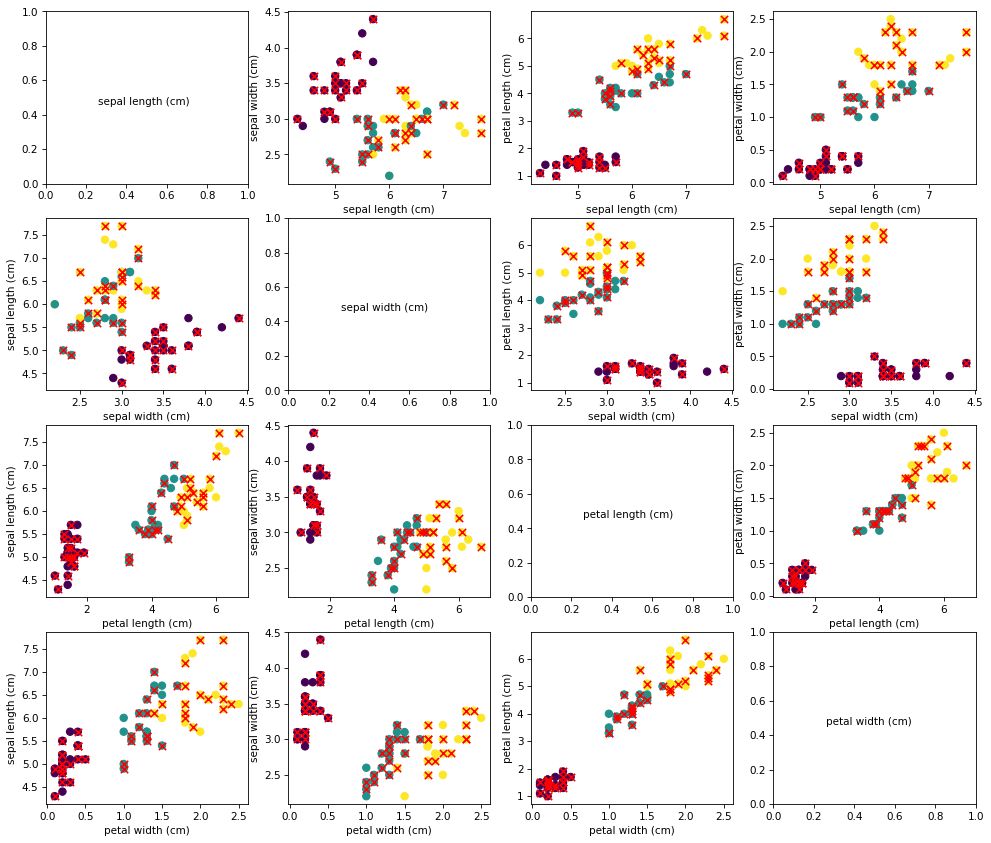

In [29]:
kwe_test(Kernels().Rect, 10, 2, True)

## Sklearn solution of iris dataset task

Accuracy
On test  =  0.9333333333333333
On train =  0.9866666666666667
On full data:  0.96
Points where prediction is wrong (count = 5)
Total number of predictions is 75


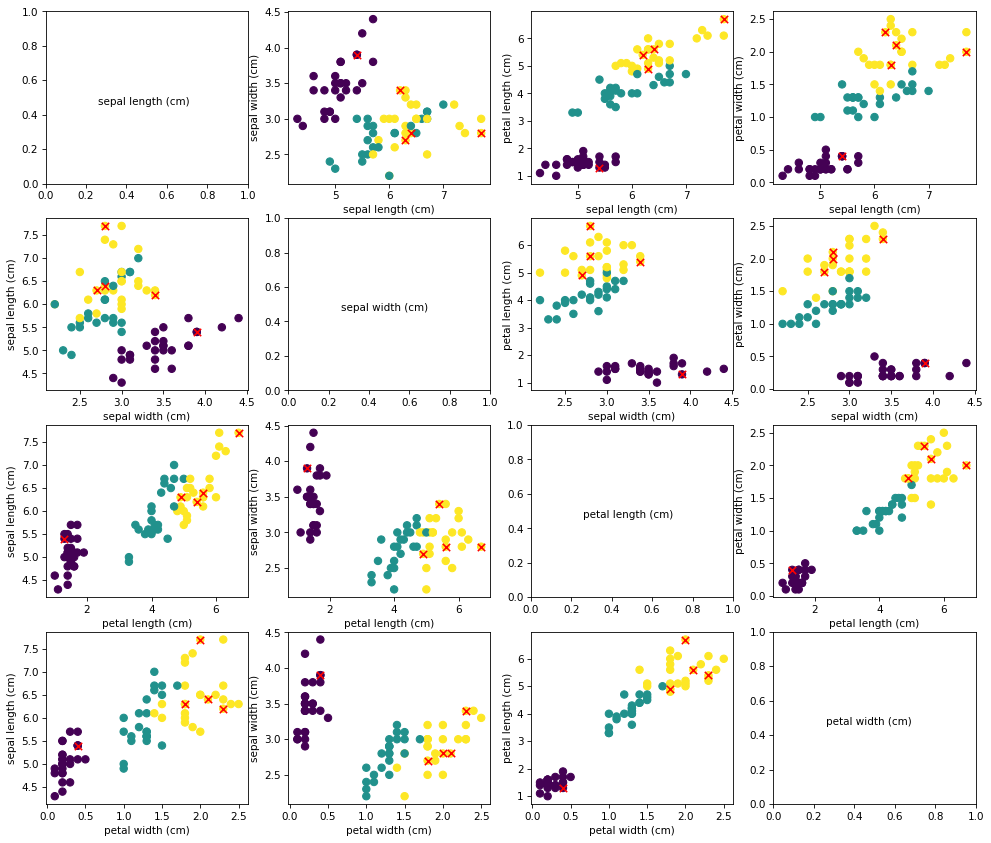

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from functools import reduce

# Necessary prepare our weights for sklearn KNeighborsClassifier
def TransformToNpArray(kernel):
    return lambda x: np.array(list(map(kernel, x[0])))

iris = datasets.load_iris()
X = iris.data  # we takeirst four features.
y = iris.target
feature_names = iris.feature_names

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 10)
kneighbors = KNeighborsClassifier(n_neighbors = 5, weights = TransformToNpArray(Kernels().NewtonianPotential))
kneighbors.fit(train_x, train_y)
kneighbors_preds = kneighbors.predict(test_x)
print("Accuracy")
print("On test  = ", metrics.accuracy_score(test_y, kneighbors_preds))
print("On train = ", metrics.accuracy_score(train_y, kneighbors.predict(train_x)))
print("On full data: ", metrics.accuracy_score(y, kneighbors.predict(X)))
bad_predictions_array = list()
for i in range(len(test_y)):
    if kneighbors_preds[i] != test_y[i]:
        bad_predictions_array.append(i)
print(f"Points where prediction is wrong (count = {len(bad_predictions_array)})")
print(f"Total number of predictions is {train_x.shape[0]}")
plt.figure(figsize = (16, 14), dpi = 75)
k = 0
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, k + 1)
        k += 1
        if i == j:
            plt.text(0.26, 0.46, feature_names[i])
        else:
            plt.scatter(train_x[:, i], train_x[:, j], c = train_y, marker='o', s = 50)
            plt.scatter(train_x[:, i][bad_predictions_array], train_x[:, j][bad_predictions_array], c = 'r', marker=  'x', s = 50) # точки с ложными предсказанием
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])